In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='utf8')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
ID,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


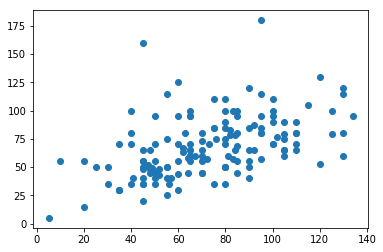

In [5]:
plt.scatter(x=df['Attack'], y=df['Defense'])

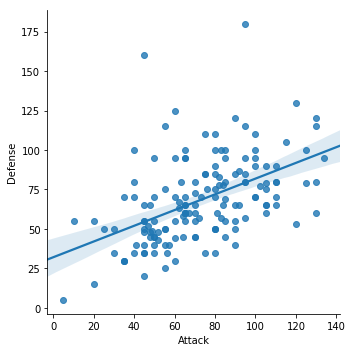

In [6]:
# plot a scatter plot
sns.lmplot(x='Attack',y='Defense',data=df)

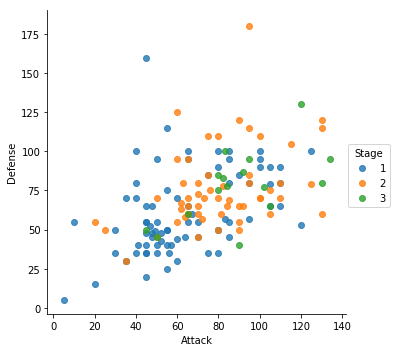

In [7]:
sns.lmplot(x='Attack',y='Defense',data=df, hue='Stage',fit_reg=False)

(-25, 190.44212186867063)

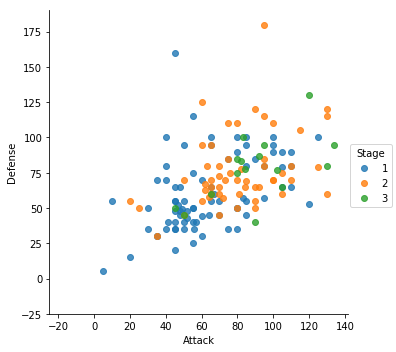

In [11]:
# customize with matplotlib
sns.lmplot(x='Attack',y='Defense',data=df, hue='Stage',fit_reg=False)
plt.xlim(-25, None)
plt.ylim(-25, None)

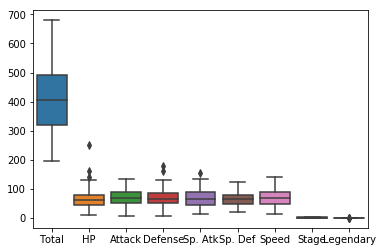

In [12]:
# pandas data frame
sns.boxplot(data=df)

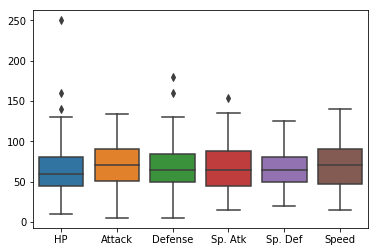

In [15]:
stat_df=df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=stat_df)

In [18]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Psychic      8
Ground       8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

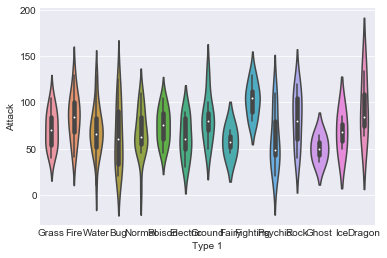

In [19]:
# seaborn themes
sns.set_style('darkgrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

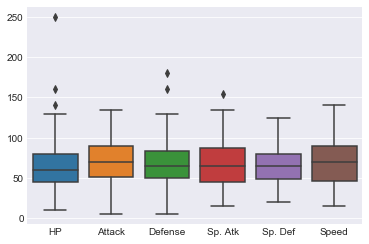

In [20]:
sns.boxplot(data=stat_df)

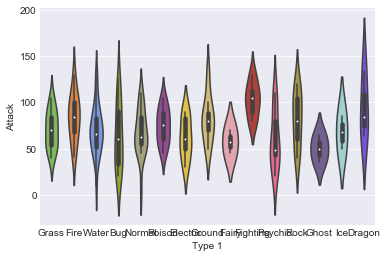

In [21]:
# color palettes
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x='Type 1',y='Attack', data=df, palette=pkmn_type_colors)

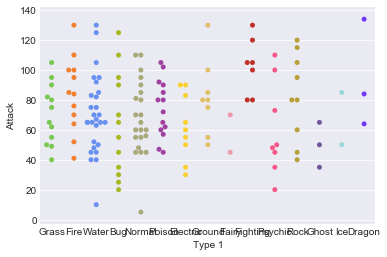

In [22]:
# swarm plot: show each point, while "stacking" those with similar values
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

### Overlay plots

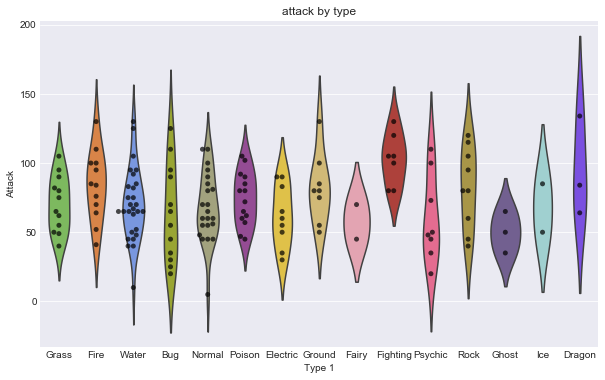

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1', y='Attack', data=df,palette=pkmn_type_colors,
              inner=None) # remove the bars inside the violins
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k',alpha=0.7)
plt.title('attack by type')

In [28]:
# put it all together
stat_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
ID,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [30]:
# melt numerical columns in stat_df to one column
melted_df=pd.melt(stat_df, id_vars=['Name','Type 1','Type 2'], # variables to keep
                 var_name='Stat')
melted_df.head(10)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


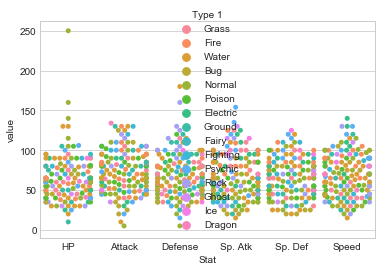

In [32]:
sns.set_style('whitegrid')
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

c:\users\ibm_admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:2764: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


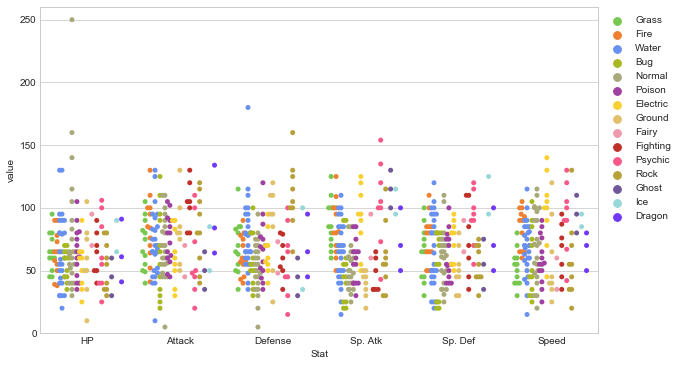

In [34]:
# few tweaks
plt.figure(figsize=(10,6))   # enlarge the plot
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1',
             palette=pkmn_type_colors,split=True) # separate points by hue
plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1,1), loc=2)  # place legend to the right


### Mini-gallery

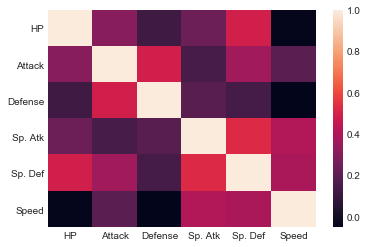

In [35]:
# heatmap
corr=stat_df.corr()
sns.heatmap(corr)

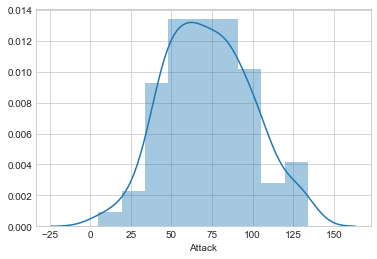

In [36]:
# Histogram
sns.distplot(df['Attack'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

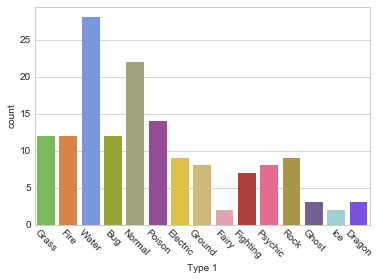

In [39]:
# bar plot
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45) # rotate x-labels

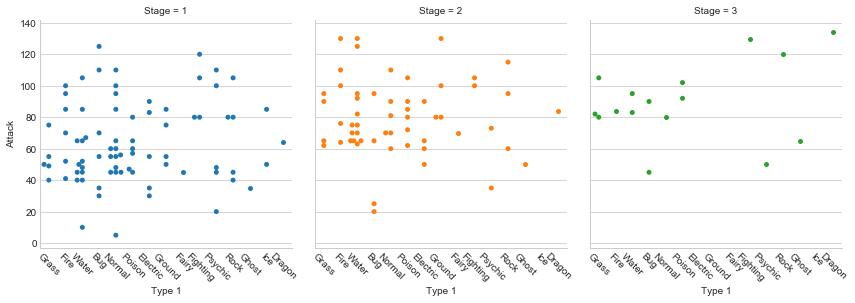

In [40]:
# factor plot
g=sns.factorplot(x='Type 1', y='Attack', data=df, hue='Stage', col='Stage',# separated/columns by Stage
                kind='swarm')

g.set_xticklabels(rotation=-45)

# Doesn't work because it only rotates last plot
#plt.xticks(rotation=-45)

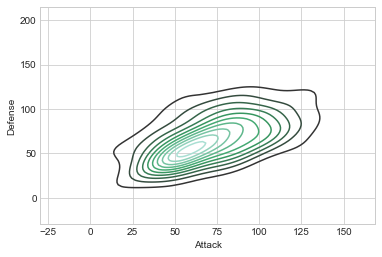

In [41]:
# density plot: display the distribution between two variables
sns.kdeplot(df.Attack, df.Defense)

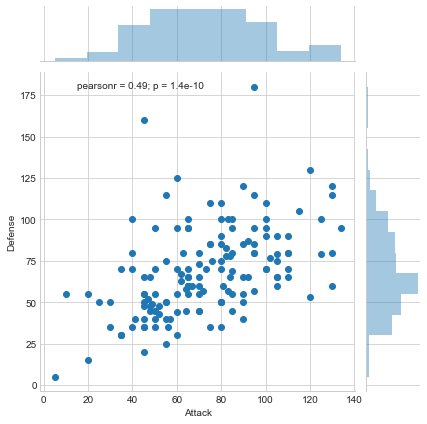

In [45]:
# Joint Distribution plot
plt.figure(figsize=(12,12))
sns.jointplot(df.Attack, df.Defense)